# events_over_line.ipynb

#### Robert Peal November 2024

- Timeseries of whether there is an event touching some line

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import sys
sys.path.append("/home/atuin/c104fa/c104fa10/utils")
import tctools2 as tct
import numpy as np
import matplotlib.pyplot as plt
import pyproj
pyproj.datadir.set_data_dir("/home/atuin/c104fa/c104fa10/software/conda/envs/atmos_sci/share/proj") ## This line is needed to allow geopandas imports
import geopandas as gpd

/home/atuin/c104fa/c104fa10/software/conda/envs/atmos_sci/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [22]:
# Path to nc files with westerlies in
westerlyPath = "/home/atuin/c104fa/c104fa10/data/westerlies/eventDataTCv3/netcdfs/events_"

# Path to shapefile
region = "EEA"
shapefilePath = f"/home/atuin/c104fa/c104fa10/data/shapefiles/{region}.shp"

# line specs
lon = 30.
latMin = -12.
latMax = 5.

years = np.arange(2018,2019)
months = np.arange(1,13)

# dataSaveLoc
dataSaveLoc = f"/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/tcWesterlyDays/eventsLine.{lon:02.0f}E.{latMin:02.0f}_{latMax:02.0f}N.csv"


In [57]:
shapefile = gpd.read_file(shapefilePath)

#### Plot the line location

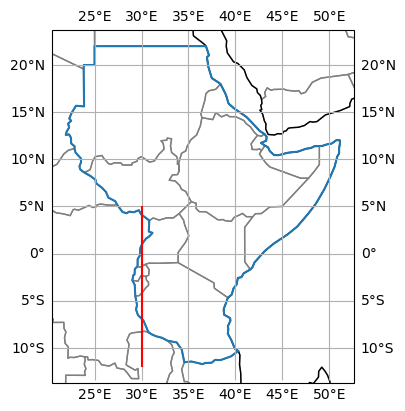

In [58]:
fig,ax = tct.new_map_axes()
shapefile.dissolve().boundary.plot(ax=ax)
ax.vlines(lon,latMin,latMax,color="red")

#### Load the data

In [59]:
data = xr.open_mfdataset([f"{westerlyPath}{year}{month:02}.nc" for year in years for month in months])

#### Select the line

In [60]:
lineData = data.sel(latitude=slice(latMax,latMin))#,method="nearest")
lineData = lineData.sel(longitude=lon,method="nearest")
lineData

<xarray.Dataset>
Dimensions:          (latitude: 69, time: 365)
Coordinates:
    longitude        float32 30.0
  * latitude         (latitude) float32 5.0 4.75 4.5 4.25 ... -11.5 -11.75 -12.0
    level            int32 700
  * time             (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-12-31
    quantile         float64 0.7
Data variables:
    westerlyMask     (time, latitude) int64 dask.array<chunksize=(31, 69), meta=np.ndarray>
    tc_westerlyMask  (time, latitude) int64 dask.array<chunksize=(31, 69), meta=np.ndarray>

#### Save days with a westerly on the line

In [61]:
lineWesterlyBinaryArray = lineData.max(dim="latitude")
lineWesterlyBinaryDf = lineWesterlyBinaryArray.to_pandas()
lineWesterlyBinaryDf

,longitude,level,quantile,westerlyMask,tc_westerlyMask
time,,,,,
2018-01-01,30.0,700,0.7,1,1
2018-01-02,30.0,700,0.7,1,1
2018-01-03,30.0,700,0.7,0,0
2018-01-04,30.0,700,0.7,0,0
2018-01-05,30.0,700,0.7,1,1
...,...,...,...,...,...
2018-12-27,30.0,700,0.7,0,0
2018-12-28,30.0,700,0.7,0,0
2018-12-29,30.0,700,0.7,0,0


In [70]:
lineWesterlyBinaryDf.to_csv(dataSaveLoc)

In [28]:
# Path to nc files with westerlies in
westerlyPath = "/home/atuin/c104fa/c104fa10/data/westerlies/eventDataTCv3/netcdfs/events_"

# # Path to shapefile
# region = "EEA"
# shapefilePath = f"/home/atuin/c104fa/c104fa10/data/shapefiles/{region}.shp"

# line specs
lon = 30.
latMin = -12.
latMax = 5.

years = np.arange(2015,2020)
months = np.arange(1,13)

# dataSaveLoc
seriesDataSaveLoc = f"/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/tcWesterlyDays/eventsLineSeries.{lon:02.0f}E.{latMin:02.0f}_{latMax:02.0f}N.{years[0]}_{years[-1]}.csv"
spatialDataSaveLoc = f"/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/tcWesterlyDays/eventsLine.{lon:02.0f}E.{latMin:02.0f}_{latMax:02.0f}N.{years[0]}_{years[-1]}.nc"

# #### Load the data
print(f"Loading westerly events from {years[0]}-{years[-1]} from {westerlyPath} ... ")
data = xr.open_mfdataset([f"{westerlyPath}{year}{month:02}.nc" for year in years for month in months])

# #### Select the line
print(f"Selecting points along {lon}E from {latMin}-{latMax}N")
lineData = data.sel(latitude=slice(latMax,latMin))#,method="nearest")
lineData = lineData.sel(longitude=lon,method="nearest").compute()

# #### Save days with a westerly on the line
print("Identifying days with a westerly along the line ...")
lineWesterlyBinaryArray = lineData.max(dim="latitude").compute()
lineWesterlyBinaryDf = lineWesterlyBinaryArray.to_pandas()

print(f"Saving spatial data to {spatialDataSaveLoc}")
lineData.to_netcdf(spatialDataSaveLoc)

print(f"Saving series data to {seriesDataSaveLoc}")
lineWesterlyBinaryDf.to_csv(seriesDataSaveLoc)

Loading westerly events from 2015-2019 from /home/atuin/c104fa/c104fa10/data/westerlies/eventDataTCv3/netcdfs/events_ ... 
Selecting points along 30.0E from -12.0-5.0N
Identifying days with a westerly along the line ...
Saving spatial data to /home/atuin/c104fa/c104fa10/eeaWesterliesPaper/tcWesterlyDays/eventsLine.30E.-12_05N.2015_2019.nc
Saving series data to /home/atuin/c104fa/c104fa10/eeaWesterliesPaper/tcWesterlyDays/eventsLineSeries.30E.-12_05N.2015_2019.csv


In [27]:
lineData

<xarray.Dataset>
Dimensions:          (latitude: 69, time: 365)
Coordinates:
    longitude        float32 30.0
  * latitude         (latitude) float32 5.0 4.75 4.5 4.25 ... -11.5 -11.75 -12.0
    level            int32 700
  * time             (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-12-31
    quantile         float64 0.7
Data variables:
    westerlyMask     (time, latitude) int64 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    tc_westerlyMask  (time, latitude) int64 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0

In [16]:
summed = lineData.sum(dim="time")
summed

<xarray.Dataset>
Dimensions:          (latitude: 69)
Coordinates:
    longitude        float32 30.0
  * latitude         (latitude) float32 5.0 4.75 4.5 4.25 ... -11.5 -11.75 -12.0
    level            int32 700
    quantile         float64 0.7
Data variables:
    westerlyMask     (latitude) int64 3 2 2 1 2 2 0 0 ... 37 39 38 40 40 41 42
    tc_westerlyMask  (latitude) int64 0 0 0 0 0 0 0 0 ... 11 12 11 12 12 12 12

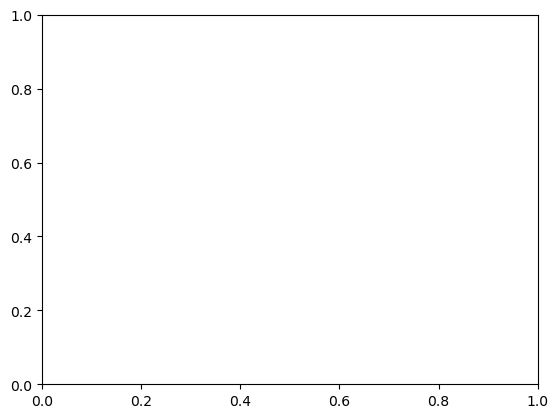

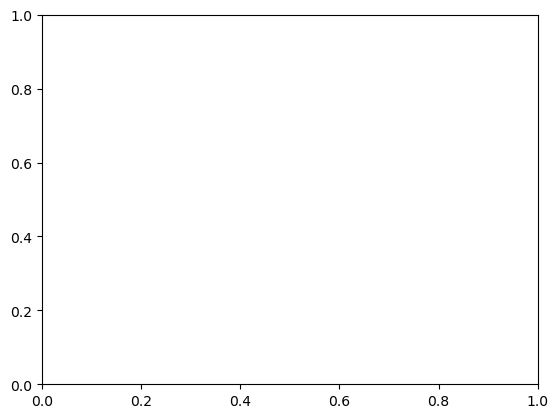

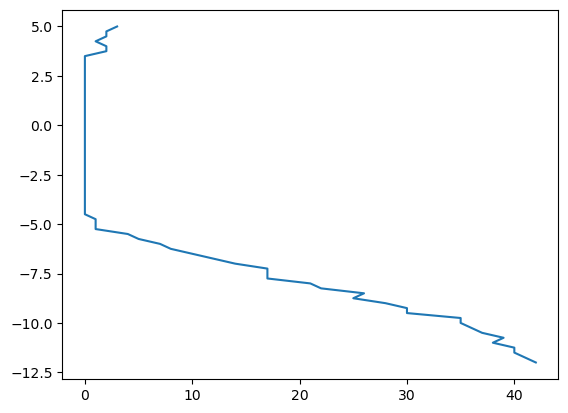

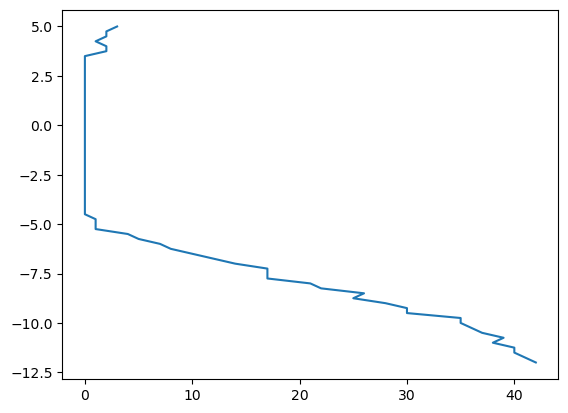

In [21]:
fig,ax=plt.subplots()

ax.plot(summed["westerlyMask"].values,summed["latitude"])

plt.show()